## LAB 2

*This R script is partially based on the 'LAB 4: Centrality' from  
the Social Network Analysis course at Stanford University
(available at: https://sna.stanford.edu/lab.php?l=4)*

The objective of this lab is to introduce graph centrality 
measures, to examine how they are interrelated, and to learn 
how to interpret their meaning

### 1. SET UP THE WORKSPACE

Install and load the required libraries

In [2]:
# install.packages('igraph')
library(igraph)

In [4]:
# install.packages('ggplot2')
library(ggplot2)

In [6]:
#install.packages('viridis')
library(viridis)

Note: a package providing access to professionally created
colour palettes: https://github.com/sjmgarnier/viridis

In [8]:
#install.packages('tidyr')
library(tidyr)

Note: we will need tidyr for some tasks 
associated with manipulating data frames

In [10]:
# install.packages('magrittr')
library(magrittr)

another new package that allows us to write a sequence of 
functions to be applied as a pipeline (using the 'pipe' notation: %>%).
This makes the code more readable

Load the data, that is, the networks we created in Lab 1

Set the data directory with respect to the current 
working directory

In [11]:
getwd()
#data_dir = "SNA_Labs/output/lab1/"
data_dir = "output/lab1/" #as this notebook is already in the SNA_Labs folder

[1] "C:/Users/Korisnik/Desktop/social network analysis RDN/SNA 2020/SNA2020-main/SNA_Labs"

In [12]:
krack_advice <- readRDS(paste0(data_dir, "krack_advice.RData"))
summary(krack_advice)

IGRAPH d21e7ed DN-- 21 190 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


In [13]:
krack_friendship <- readRDS(paste0(data_dir, "krack_friendship.RData"))
summary(krack_friendship)

IGRAPH d26c906 DN-- 21 102 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


In [14]:
krack_reports_to <- readRDS(paste0(data_dir, "krack_reports_to.RData"))
summary(krack_reports_to)

IGRAPH d27c3d1 DN-- 21 20 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


### 2. NODE-LEVEL STATISTICS: CENTRALITY MEASURES

#### 2.1 Degree centrality

Compute in-degree and out-degree for each node, 
first in the advice network

In [15]:
?degree

In [16]:
advice_deg_in <- degree(krack_advice, mode="in") 
advice_deg_in
table(advice_deg_in)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 
13 18  5  8  5 10 13 10  4  9 11  7  4 10  4  8  9 15  4  8 15

advice_deg_in
 4  5  7  8  9 10 11 13 15 18 
 4  2  1  3  2  3  1  2  2  1 

Note: 
whenever you want to compare a metric across networks (of different sizes),
that metric should be normalised (by setting normalized = TRUE), to account
for the difference in the network sizes.

In [17]:
advice_deg_out <- degree(krack_advice, mode="out") 
advice_deg_out
table(advice_deg_out)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 
 6  3 15 12 15  1  8  8 13 14  3  2  6  4 20  4  5 17 11 12 11

advice_deg_out
 1  2  3  4  5  6  8 11 12 13 14 15 17 20 
 1  1  2  2  1  2  2  2  2  1  1  2  1  1 

To better appreciate the computed values, we will visualise them

First, create a data frame that integrates the computed 
in and out degree measures for all the nodes

In [18]:
deg_advice_df <- data.frame(node_id=V(krack_advice)$name, 
                            in_degree=advice_deg_in,
                            out_degree=advice_deg_out)
head(deg_advice_df)

node_id,in_degree,out_degree
1,13,6
2,18,3
3,5,15
4,8,12
5,5,15
6,10,1


Then, transform the data frame from wide to long format suitable
for plotting; to that end, we'll use the pivot_longer() f. from 
the tidyr package

In [19]:
?pivot_longer

In [20]:
deg_advice_df_long <- pivot_longer(data = deg_advice_df, 
                                 cols = in_degree:out_degree,
                                 names_to = 'degree_type', 
                                 names_ptypes = list(degree_type = factor()),
                                 values_to = 'degree_value')
head(deg_advice_df_long)
tail(deg_advice_df_long)

node_id,degree_type,degree_value
1,in_degree,13
1,out_degree,6
2,in_degree,18
2,out_degree,3
3,in_degree,5
3,out_degree,15


node_id,degree_type,degree_value
19,in_degree,4
19,out_degree,11
20,in_degree,8
20,out_degree,12
21,in_degree,15
21,out_degree,11


Finally, create a bar plot to visualise actors' degree values 

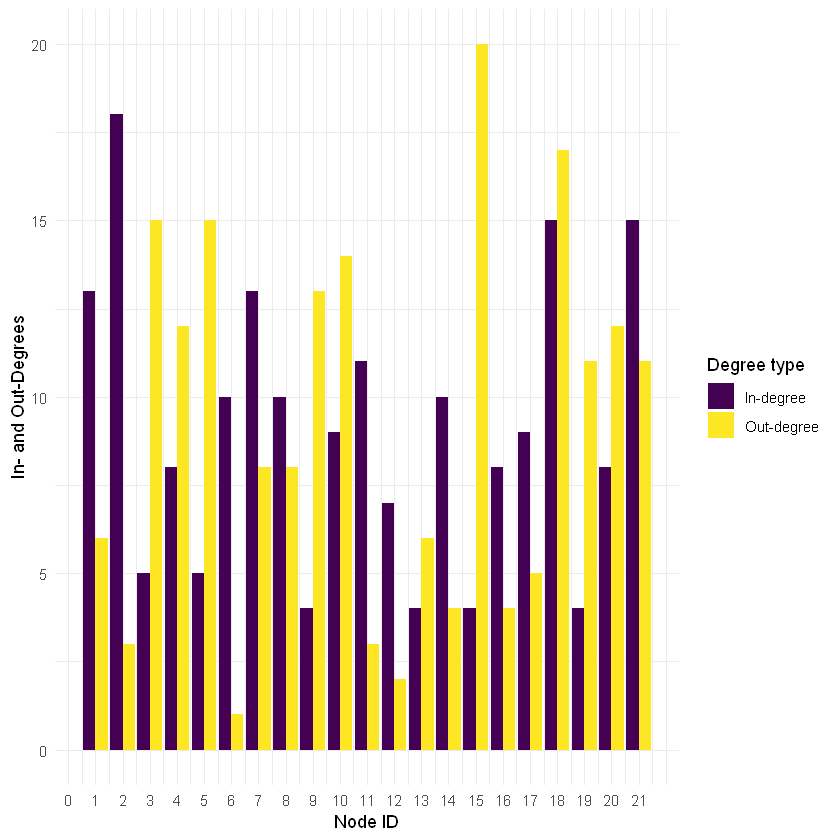

In [21]:
ggplot(data = deg_advice_df_long, 
       mapping = aes(x=node_id, y=degree_value, fill=degree_type)) +
  geom_col(position = position_dodge()) +
  labs(x = "Node ID", y = "In- and Out-Degrees") +
  scale_fill_viridis(name = "Degree type",
                     labels = c("In-degree", "Out-degree"),
                     discrete = TRUE) +
  scale_x_continuous(breaks = seq(0,21,1)) +
  theme_minimal()

To examine degree distribution, we'll use a histogram

In [22]:
max_degree <- max(deg_advice_df_long$degree_value)
min_degree <- min(deg_advice_df_long$degree_value)

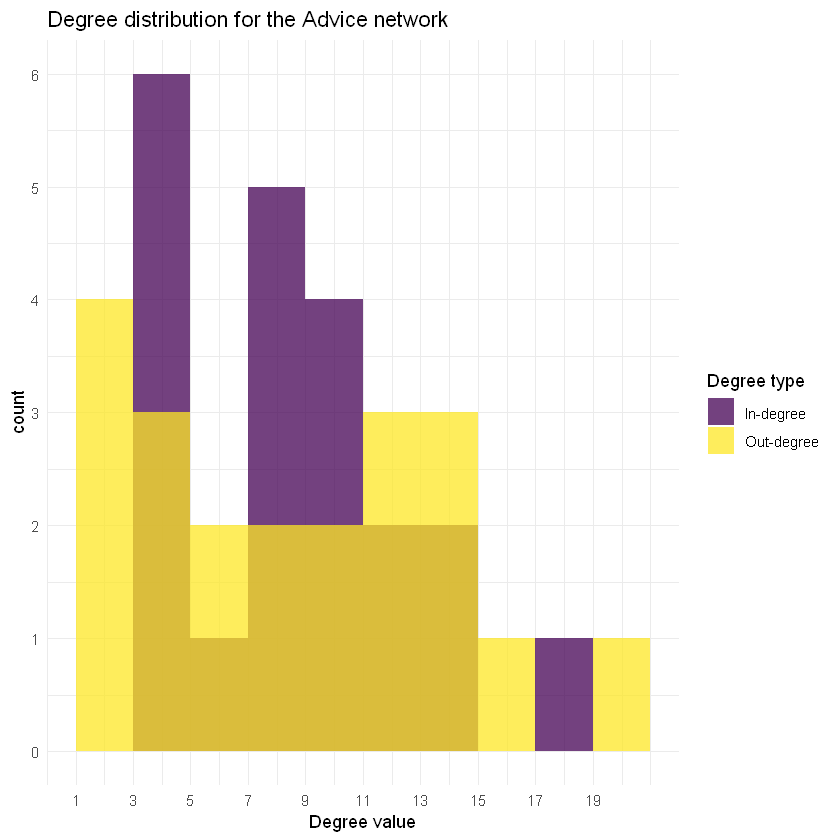

In [23]:
ggplot(data = deg_advice_df_long, 
       mapping = aes(x = degree_value, fill = degree_type)) +
  geom_histogram(binwidth = 2, 
                 position = position_identity(), 
                 alpha=0.75) +
  labs(x = "Degree value", title = "Degree distribution for the Advice network") +
  scale_fill_viridis(name = "Degree type",
                     labels = c("In-degree", "Out-degree"),
                     discrete = TRUE) +
  scale_x_continuous(breaks = seq(min_degree,max_degree,2)) +
  scale_y_continuous(breaks = seq(0,6)) +
  theme_minimal()

Another way to visualise and interpret the computed metrics is to plot a
network as a graph and scale nodes' size and color based on the computed
in- and out-degree values. 
So, let's plot the advice network as a graph with in-degree determining the 
node color and out-degree represented through the node size.

To create a color palette based on the computed in-degree values, we will use 
the attr_based_color_gradient() function from the SNA_custom_functions R script

In [24]:
#source('SNA_Labs/SNA_custom_functions.R')
source('SNA_custom_functions.R') #as this notebook is already in the SNA_Labs folder

The function creates a gradient color vector with as many color gradients as 
there are different values in the given attribute 

In [26]:
viridis_pal_ends = c('#F0F921FF', '#8305A7FF')
in_degree_colors = attr_based_color_gradient(g_attr = deg_advice_df$in_degree,
                                             pal_end_points = viridis_pal_ends)
in_degree_colors

[1] "#A7567A" "#8305A7" "#F0F921" "#D7C23E" "#F0F921" "#BF8C5C" "#A7567A"
 [8] "#BF8C5C" "#F0F921" "#CBA74D" "#BF8C5C" "#D7C23E" "#F0F921" "#BF8C5C"
[15] "#F0F921" "#D7C23E" "#CBA74D" "#9B3B89" "#F0F921" "#D7C23E" "#9B3B89"

Note: 
to select colors using the viridis and similar colour blind safe pallets, 
consult this post:
https://www.thinkingondata.com/something-about-viridis-library/
or use this R Colors cheatsheet:
https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf 

Now, we can make a graph plot as we did in Lab 1

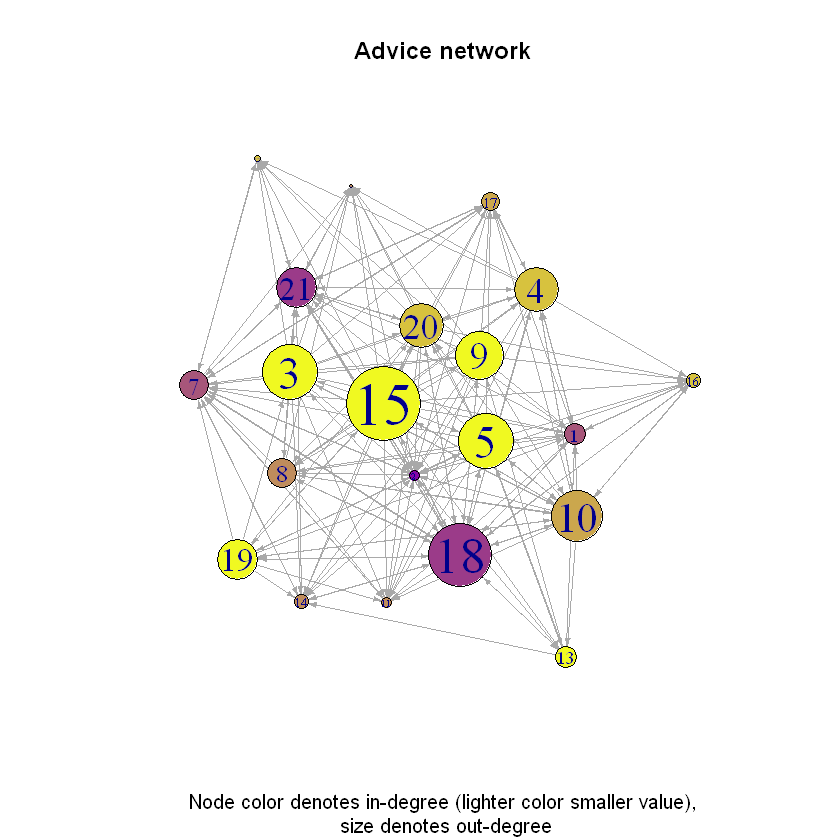

In [27]:
plot(krack_advice, 
     layout=layout_with_kk(krack_advice), 
     vertex.color = in_degree_colors, 
     vertex.size = deg_advice_df$out_degree * 1.5,
     vertex.label.cex	= deg_advice_df$out_degree * 0.15,
     edge.arrow.size = 0.3,
     main="Advice network",
     sub="Node color denotes in-degree (lighter color smaller value),\n size denotes out-degree")

##### TASK 1:

Compute in-degree and out-degree for the nodes in the other two networks 
(friendship and reports-to) and visualise the computed values (as done above).
Also, create visualizations for the degree distribution for those two networks. 
Compare the degree distribution of the three networks: advice, friendship and 
reports-to. Note down your observations.


#### 2.2 Closeness centrality 

We'll start with an undirected network, as it is somewhat easier to deal with
when it comes to the closeness centrality.
Let's consider the friendship network and transform it into an undirected network.
But before doing so, we'll add strength attribute (equal to 1) to each edge, so that
after the transformation into undirected network we can differentiate between 
reciprocal ties (their strength will be 2) and one-way ties (strength will remain 1)

In [28]:
E(krack_friendship)$strength <- 1
summary(krack_friendship)
krack_friendship_undirect <- as.undirected(krack_friendship, 
                                           mode = "collapse",
                                           edge.attr.comb = list(strength='sum'))

IGRAPH d26c906 DN-- 21 102 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n),
| strength (e/n)


Note that we are summing edge weights - see the documentation for attribute combination
for more options

In [29]:
summary(krack_friendship_undirect)
table(E(krack_friendship_undirect)$strength)

IGRAPH 1faf8cb UN-- 21 79 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n),
| strength (e/n)



 1  2 
56 23 

Before computing closeness, let's check if the network is connected.
A network is connected if there is a path between any pair of nodes
in the network.

In [30]:
is_connected(krack_friendship_undirect)

[1] TRUE

In [31]:
?closeness

In [32]:
closeness_friend_undirect <- closeness(krack_friendship_undirect)
summary(closeness_friend_undirect)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02439 0.02857 0.02941 0.03089 0.03226 0.04545 

We can also include edge attributes (weights) in the calculation of closeness.
It is important to note that edge "weights are used for calculating weighted 
shortest paths, so they are interpreted as distances".
In our case higher edge weights mean stronger relations, that is, lower distance. 
So, to appropriately calculate weighted closeness, we should to take 
reciprocal value of the 'strength' attribute:

In [33]:
cl_weighted_friend_undirect <- closeness(krack_friendship_undirect, 
                                         weights = 1/E(krack_friendship_undirect)$strength)
summary(cl_weighted_friend_undirect)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02857 0.03279 0.04000 0.03817 0.04255 0.05714 

To better appreciate the computed metrics, let's visualise them.
In particular, let's plot a graph with closeness determining the node color 
and degree represented through the node size.
First, create color palettes

In [34]:
closeness_colors = attr_based_color_gradient(g_attr = closeness_friend_undirect, 
                                             pal_end_points = viridis_pal_ends)
cl_weighted_colors = attr_based_color_gradient(g_attr = cl_weighted_friend_undirect, 
                                             pal_end_points = viridis_pal_ends)

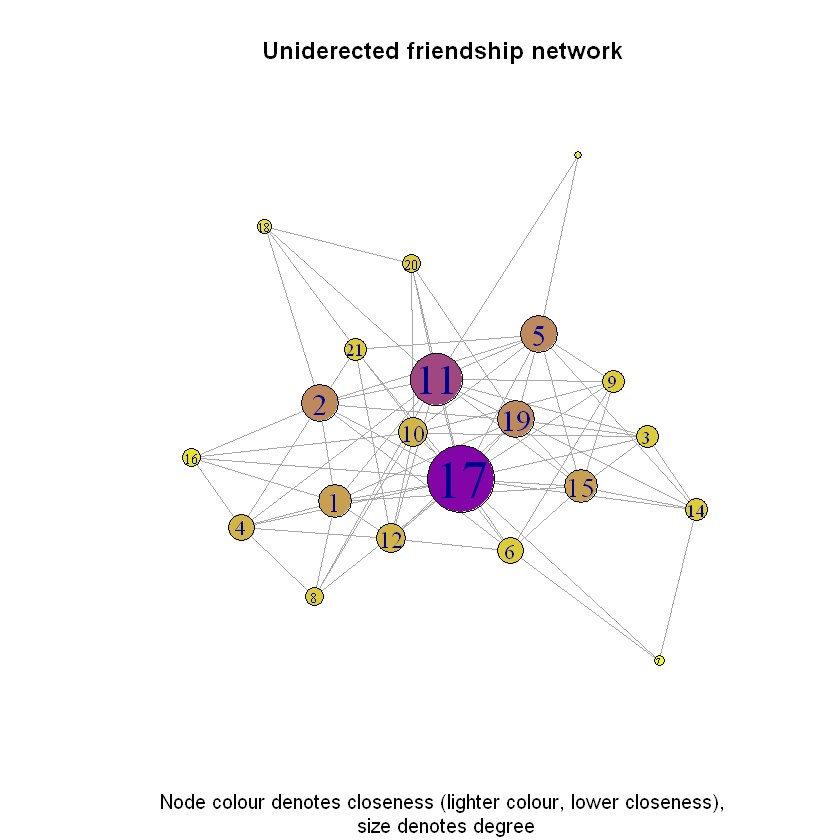

In [35]:
# Now, make a plot
plot(krack_friendship_undirect, 
     layout=layout_nicely(krack_friendship_undirect), 
     vertex.color = closeness_colors, #cl_weighted_colors,
     vertex.size = 1.5 * degree(krack_friendship_undirect),
     vertex.label.cex	= 0.15 * degree(krack_friendship_undirect),
     main="Uniderected friendship network",
     sub="Node colour denotes closeness (lighter colour, lower closeness),\n size denotes degree")

Now, we move (go back) to directed network and compute in-closeness and 
out-closeness centrality.
You can think of in-closeness centrality as the average number of steps 
one would have to make to get TO a given node FROM all other reachable
nodes in the network. Out-closeness centrality, not surprisingly, 
measures the same thing with the directionality reversed: the average
number of steps FROM the given node TO any other reachable node in the 
network.

First, check if the network is connected.
Note: in directed networks, we need to differentiate between two modes
of connectedness: 'weak' and 'strong'. The 'weak' form does not consider
edge direction, whereas the 'strong' mode does consider the direction of
edges 

In [36]:
is.connected(krack_friendship, mode='strong')

[1] FALSE

not connected -> cannot compute true closeness values
We will find the giant component (= the largest connected component in the graph)
and compute closeness on this (sub)graph 

In [37]:
fr_components <- components(krack_friendship, mode = 'strong')
str(fr_components)
fr_components$membership

List of 3
 $ membership: Named num [1:21] 1 1 1 1 1 1 3 1 2 1 ...
  ..- attr(*, "names")= chr [1:21] "1" "2" "3" "4" ...
 $ csize     : num [1:3] 19 1 1
 $ no        : int 3


1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 
 1  1  1  1  1  1  3  1  2  1  1  1  1  1  1  1  1  1  1  1  1

Observe components (and their members) by plotting the graph 

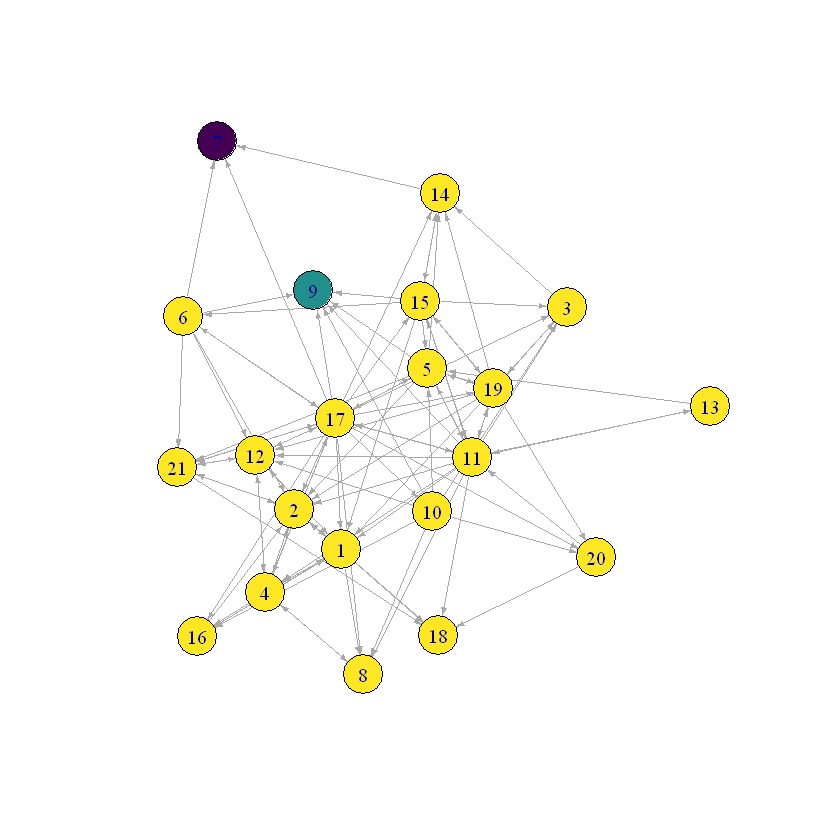

In [38]:
plot(krack_friendship, 
     layout=layout_nicely(krack_friendship), 
     vertex.color = fr_components$membership,
     edge.arrow.size = 0.3,
     palette=viridis(n=3, direction = -1))

two nodes outside the giant component; get ids of those nodes

In [39]:
not_in_gc <- which(fr_components$membership != 1)

create the giant component by removing these two nodes

In [40]:
friendship_gc <- delete.vertices(krack_friendship, not_in_gc)
summary(friendship_gc)
is.connected(friendship_gc, mode='strong')

IGRAPH 288d572 DN-- 19 93 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n),
| strength (e/n)


[1] TRUE

Now that we have a connected friendship (sub)graph, we can compute in- and
out-closeness

In [41]:
friendship_closeness = data.frame(node_id=V(friendship_gc)$name,
                                  in_cl=closeness(friendship_gc, mode = 'in'),
                                  out_cl=closeness(friendship_gc, mode = 'out'))
str(friendship_closeness)

'data.frame':	19 obs. of  3 variables:
 $ node_id: int  1 2 3 4 5 6 8 10 11 12 ...
 $ in_cl  : num  0.0357 0.037 0.0263 0.0294 0.027 ...
 $ out_cl : num  0.0238 0.0227 0.0227 0.0323 0.0333 ...


Let's visualise these measures using node and label size to represent in-closeness,
and node color to represent out-closeness

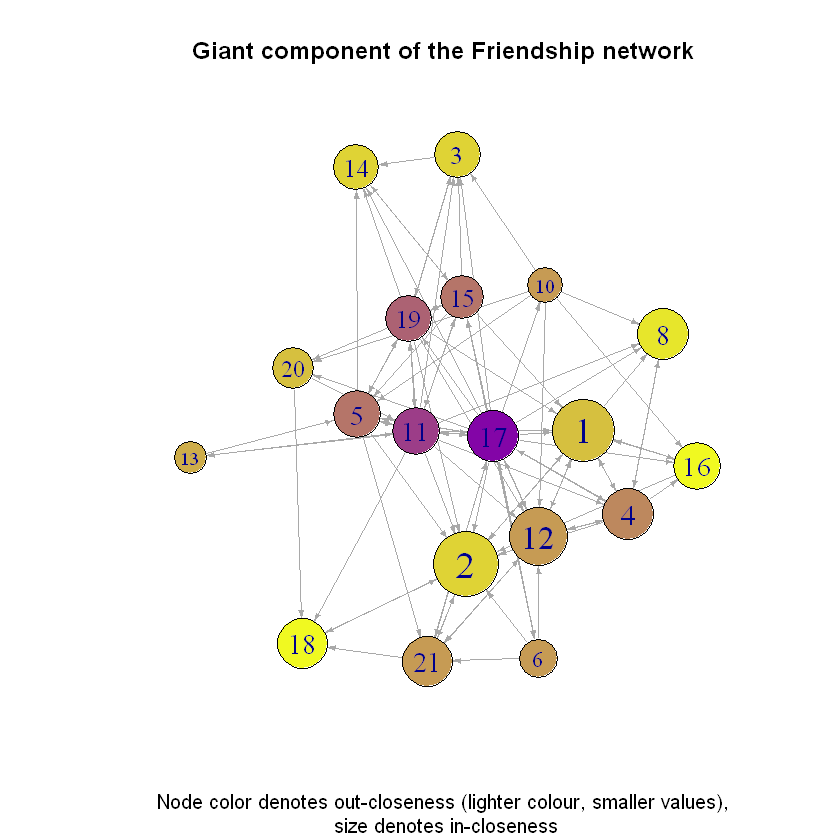

In [42]:
out_closeness_colors = attr_based_color_gradient(friendship_closeness$out_cl, 
                                                 viridis_pal_ends)
plot(friendship_gc, 
     layout=layout_nicely(friendship_gc), 
     vertex.color=out_closeness_colors, 
     vertex.size=friendship_closeness$in_cl*700, # in-closeness is multiplied by 700 since in-closeness values are very small 
     vertex.label.cex=friendship_closeness$in_cl*50, 
     edge.arrow.size=.30,
     main="Giant component of the Friendship network",
     sub="Node color denotes out-closeness (lighter colour, smaller values),\n size denotes in-closeness")

It seems that those with high in-closeness have low to moderate out-closeness and vice versa;
We will check that later by computing correlations of centrality measures.

##### TASK 2:  

Do the same kinds of computations and visualizations for the advice network
and compare them to the results obtained for the friendship network. 
Note down your observations.


#### 2.3 Betweenness centrality

Betweenness centrality measures the number of shortest paths 
between node pairs that go through a specific vertex.

In [43]:
?betweenness

In [44]:
summary(betweenness(krack_friendship))
quantile(betweenness(krack_friendship), probs = seq(0.9,1,0.025))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.700   5.583  19.952  29.067 134.433 

90%     92.5%       95%     97.5%      100% 
 33.91667  46.18333  58.45000  96.44167 134.43333

Compute betweenness for all the networks and store them in a data frame

In [45]:
krack_betweenness_df <- data.frame(node_id=V(krack_advice)$name,
                                  advice=betweenness(krack_advice),
                                  friendship=betweenness(krack_friendship),
                                  reports_to=betweenness(krack_reports_to))
krack_betweenness_df

node_id,advice,friendship,reports_to
1,13.7468254,29.066667,0
2,5.9357143,33.483333,3
3,6.6047619,1.900000,0
4,13.7087302,31.666667,0
5,5.0785714,17.416667,0
6,0.0000000,3.733333,0
7,27.6246032,0.000000,0
8,3.9746032,0.500000,0
9,3.9539683,0.000000,0
10,18.2968254,0.000000,0


Identify the node with the highest betweenness in the advice network:

In [46]:
max(krack_betweenness_df$advice)
which(krack_betweenness_df$advice == max(krack_betweenness_df$advice))

[1] 88.91667

[1] 18

Identify nodes with the highest betweenness in each network:

In [47]:
apply(krack_betweenness_df[,-1], 2, function(x) which(x==max(x)))

advice friendship reports_to 
        18         17         14

Interestingly, no overlap across the networks

Let's visualise betwennees across the networks

First, transform the data frame from wide to long format

In [48]:
krack_betweenness_long <- pivot_longer(data = krack_betweenness_df,
                                       cols = 2:4,
                                       names_to = "tie_type",
                                       names_ptypes = list(tie_type=factor()),
                                       values_to = "betweenness")
head(krack_betweenness_long)

node_id,tie_type,betweenness
1,advice,13.746825
1,friendship,29.066667
1,reports_to,0.000000
2,advice,5.935714
2,friendship,33.483333
2,reports_to,3.000000


Then, make a bar plot showing for each actor their betweenness value in each 
of the 3 networks

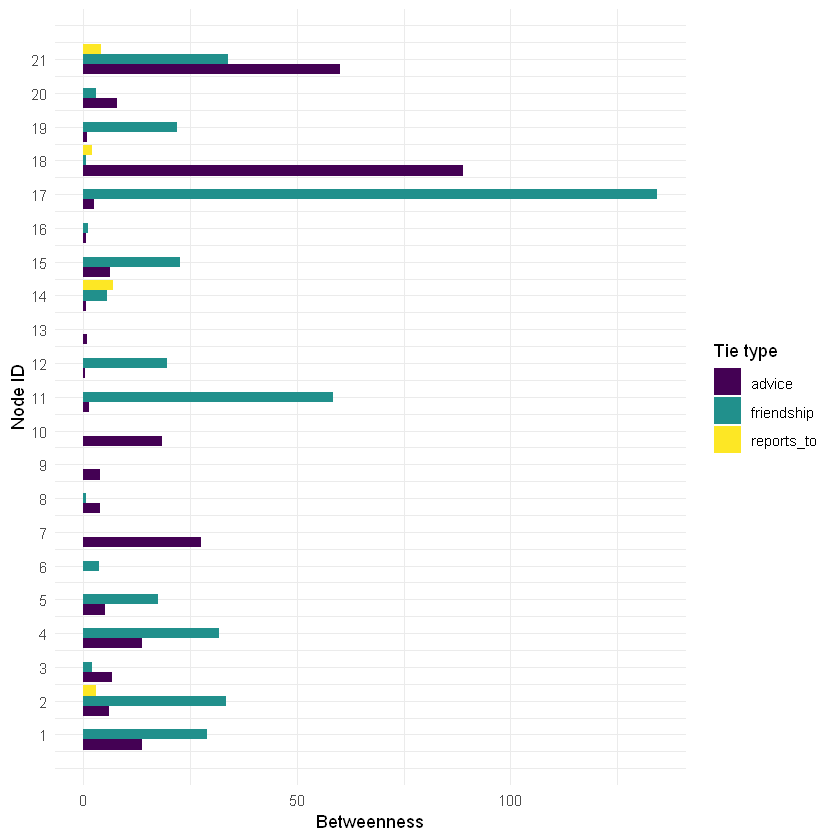

In [49]:
ggplot(data = krack_betweenness_long,
       mapping = aes(x = node_id, y = betweenness, fill = tie_type)) +
  geom_col(position = position_dodge()) +
  labs(x = "Node ID", y = "Betweenness") +
  scale_fill_viridis(name = "Tie type", discrete = TRUE) +
  scale_x_continuous(breaks = 1:21) +
  theme_minimal() + 
  coord_flip()

We can also examine the distribution of betweenness values across the 3 networks

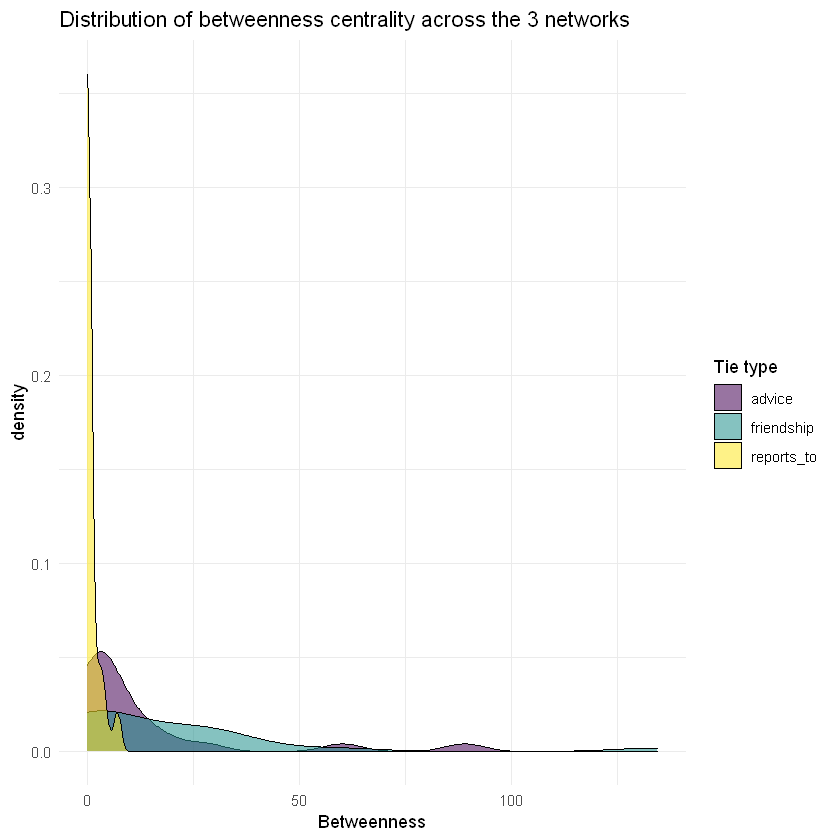

In [50]:
ggplot(data = krack_betweenness_long,
       mapping = aes(x = betweenness, fill = tie_type)) +
  #    mapping = aes(x = log(betweenness + 1), fill = tie_type)) + # log based scalling for more meaningful visualisation 
  # geom_histogram(position = position_identity(), binwidth = 10) +
  geom_density() + # density function offers a better insight (compared to histogram) into the distribution
  scale_fill_viridis(name="Tie type", discrete = TRUE, alpha=0.55) +
  labs(x = "Betweenness", title = "Distribution of betweenness centrality across the 3 networks") +
  theme_minimal()

##### TASK 3:  

Visualize the three networks (advice, friendship, and reports-to) by
plotting them as graphs where the node color represents betweenness 
whereas the node size represents in-degree (try also in-closeness). 


#### 2.4 Eigen vector centrality

Eigen vector centrality gives higher scores to nodes the more they 
are connected to other highly connected nodes. It reflects the notion
that it is not important how many connections one has, but how important
one's connections are. Hence, it is often interpreted as a measure of 
a node's network importance.

In [51]:
?eigen_centrality

Let's compute Eigenvector centrality for the friendship network

In [52]:
eigen_friend <- eigen_centrality(krack_friendship, directed = TRUE)
str(eigen_friend)

List of 3
 $ vector : Named num [1:21] 0.922 1 0.379 0.639 0.396 ...
  ..- attr(*, "names")= chr [1:21] "1" "2" "3" "4" ...
 $ value  : num 5.05
 $ options:List of 20
  ..$ bmat   : chr "I"
  ..$ n      : int 21
  ..$ which  : chr "LR"
  ..$ nev    : int 1
  ..$ tol    : num 0
  ..$ ncv    : int 0
  ..$ ldv    : int 0
  ..$ ishift : int 1
  ..$ maxiter: int 1000
  ..$ nb     : int 1
  ..$ mode   : int 1
  ..$ start  : int 1
  ..$ sigma  : num 0
  ..$ sigmai : num 0
  ..$ info   : int 0
  ..$ iter   : int 4
  ..$ nconv  : int 1
  ..$ numop  : int 25
  ..$ numopb : int 0
  ..$ numreo : int 24


Note that we are only interested in the $vector element of the object
returned by the eigen_centrality() function

In [53]:
eigen_friend <- eigen_friend$vector
summary(eigen_friend)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.08185 0.36802 0.42541 0.45716 0.58343 1.00000 

We can also compute weighted Eigenvector centrality.
We will compute this measure on undirected friendship network since
it is a weighted network (the directed one does not have weights).
Note that in this case, weights are interpreted as the reflection of the 
connection strength: "higher weights spread the centrality better"
This is fully suitable for the friendship network.

In [54]:
w_eigen_friend <- eigen_centrality(krack_friendship_undirect, 
                                    weights = E(krack_friendship_undirect)$strength)
w_eigen_friend <- w_eigen_friend$vector
summary(w_eigen_friend)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1434  0.3157  0.3939  0.4717  0.6329  1.0000 

Plot the friendship graph with eigenvector centrality represented 
through the nodes' color, and degree centrality through the nodes' size

In [55]:
eigen_col = attr_based_color_gradient(eigen_friend, viridis_pal_ends)

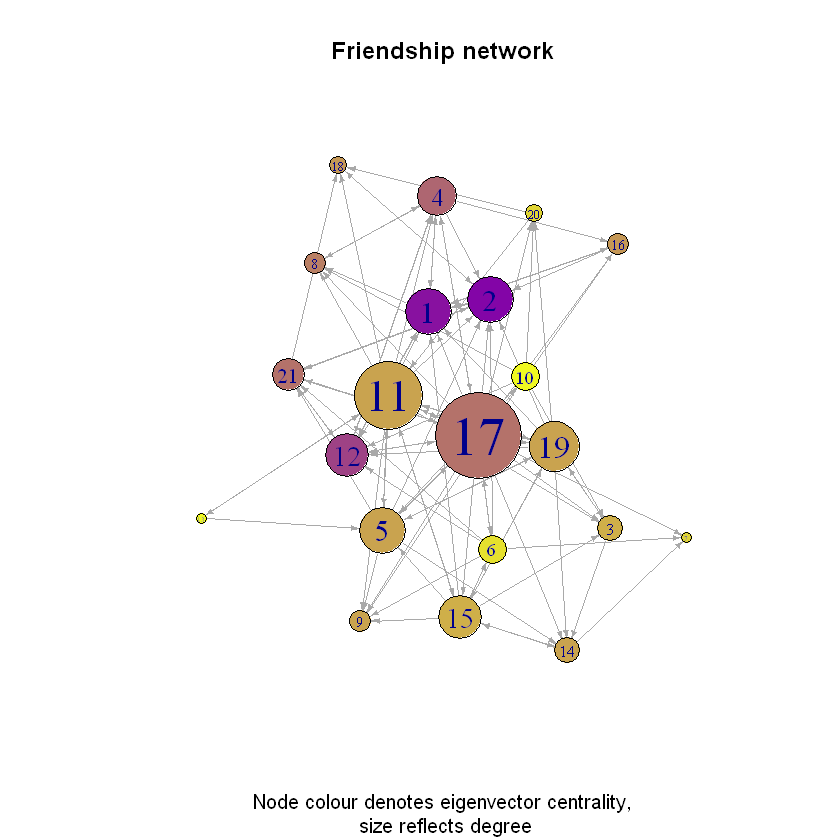

In [56]:
plot(krack_friendship, 
     layout=layout_with_kk(krack_friendship), 
     vertex.color=eigen_col, 
     vertex.size=degree(krack_friendship) * 1.5,
     vertex.label.cex=degree(krack_friendship) * 0.115,
     edge.arrow.size=0.3,
     main="Friendship network",
     sub="Node colour denotes eigenvector centrality,\n size reflects degree")

Note that actors with the highest number of connections (that is, highest degree)
are not at the same time the most important according to Eigen vector centrality 

##### TASK 4:  

Do the same kinds of computations and visualizations for the other two networks 
(advice and reports-to) and compare them to the results obtained for the 
friendship network. Note down your observations.

#### 2.5 Summary of centrality metrics

We'll use the friendship network as an example to compare and contrast all 
examined centrality measures on one network.
To that end, we'll first construct a data frame with the vertices as rows 
and the centrality scores as columns:

In [57]:
friendship_centrality_all <- data.frame(node_id=V(krack_friendship)$name,
                                        in_degree=degree(krack_friendship, mode = 'in'),
                                        out_degree=degree(krack_friendship, mode = 'out'),
                                        betweenness=krack_betweenness_df$friendship,
                                        eigen=eigen_friend)

In [58]:
#View(friendship_centrality_all) #'View()' not yet supported in the Jupyter R kernel
head(friendship_centrality_all)

node_id,in_degree,out_degree,betweenness,eigen
1,8,5,29.066667,0.9219555
2,10,3,33.483333,1.0000000
3,5,2,1.900000,0.3793978
4,5,6,31.666667,0.6390703
5,6,7,17.416667,0.3956037
6,2,6,3.733333,0.1901061


Recall that to compute in- and out-closeness we had to remove a few vertices,
so, we need to add these scores in a separate step, using the merge() function
which allows for merging two data frames based on the given "key"

In [59]:
?merge

In [60]:
friendship_centrality_all <- merge(x = friendship_centrality_all, 
                                   y = friendship_closeness,
                                   # by = 'node_id',
                                   all.x = TRUE, all.y = TRUE)
str(friendship_centrality_all)
#View(friendship_centrality_all)

'data.frame':	21 obs. of  7 variables:
 $ node_id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ in_degree  : num  8 10 5 5 6 2 3 5 6 1 ...
 $ out_degree : num  5 3 2 6 7 6 0 1 0 7 ...
 $ betweenness: num  29.1 33.5 1.9 31.7 17.4 ...
 $ eigen      : num  0.922 1 0.379 0.639 0.396 ...
 $ in_cl      : num  0.0357 0.037 0.0263 0.0294 0.027 ...
 $ out_cl     : num  0.0238 0.0227 0.0227 0.0323 0.0333 ...


Now we can sort the data frame to find the most central actors 
according to different centrality measures we have computed.

In [61]:
# Sort by betwenness
friendship_centrality_all[order(friendship_centrality_all$betweenness, decreasing = TRUE),]

,node_id,in_degree,out_degree,betweenness,eigen,in_cl,out_cl
17,17,6,18,134.433333,0.59209877,0.02941176,0.05000000
11,11,6,13,58.450000,0.41336194,0.02702703,0.04166667
21,21,5,4,33.916667,0.58343291,0.02857143,0.03030303
2,2,10,3,33.483333,1.00000000,0.03703704,0.02272727
4,4,5,6,31.666667,0.63907026,0.02941176,0.03225806
1,1,8,5,29.066667,0.92195552,0.03571429,0.02380952
15,15,4,8,22.566667,0.36801931,0.02500000,0.03333333
19,19,5,9,21.883333,0.42540552,0.02631579,0.03571429
12,12,8,4,19.658333,0.76877948,0.03333333,0.03030303
5,5,6,7,17.416667,0.39560373,0.02702703,0.03333333


In [62]:
# # alternative way (requires dplyr package):
# friendship_centrality_all %>% arrange(desc(betweenness)) %>% View()
# # Note that betweenness seems to be correlated with out-degree and out-closeness

In [63]:
# Sort by eigenvector centrality
friendship_centrality_all[order(friendship_centrality_all$eigen, decreasing = TRUE),]

,node_id,in_degree,out_degree,betweenness,eigen,in_cl,out_cl
2,2,10,3,33.483333,1.00000000,0.03703704,0.02272727
1,1,8,5,29.066667,0.92195552,0.03571429,0.02380952
12,12,8,4,19.658333,0.76877948,0.03333333,0.03030303
4,4,5,6,31.666667,0.63907026,0.02941176,0.03225806
17,17,6,18,134.433333,0.59209877,0.02941176,0.05000000
21,21,5,4,33.916667,0.58343291,0.02857143,0.03030303
8,8,5,1,0.500000,0.53138501,0.02941176,0.02083333
16,16,4,2,1.000000,0.44953816,0.02702703,0.01785714
18,18,4,1,0.700000,0.43985882,0.02857143,0.01639344
14,14,5,2,5.583333,0.42779019,0.02564103,0.02127660


In [64]:
# # alternative way:
# friendship_centrality_all %>% arrange(desc(eigen)) %>% View()
# # Note that Eigenvector c. seems to be correlated with in-degree and in-closeness

##### TASK 5: 

Try to interpret these results - how can we explain the observed correlations?
Make the same computation and comparison for the advice network - do you observe
the same relations between the metrics?

### 3. CORRELATIONS BETWEEN CENTRALITY MEASURES

Now we'll more thoroughly examine correlations between the centrality metrics 
to determine how closely these measures are interrelated.To that end, we'll 
use the data frame with centrality metrics for the friendship network.

We need to compute pairwise correlations, that is, to generate a table
with correlation values for each centrality measures pair.
To determine how to compute these correlations, we need to check if the 
assumption of normal distribution applies to our centrality measures:

$in_degree

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9531, p-value = 0.3892


$out_degree

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.86027, p-value = 0.006416


$betweenness

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.65581, p-value = 8.133e-06


$eigen

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.94305, p-value = 0.2503


$in_cl

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96093, p-value = 0.5908


$out_cl

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9436, p-value = 0.3058



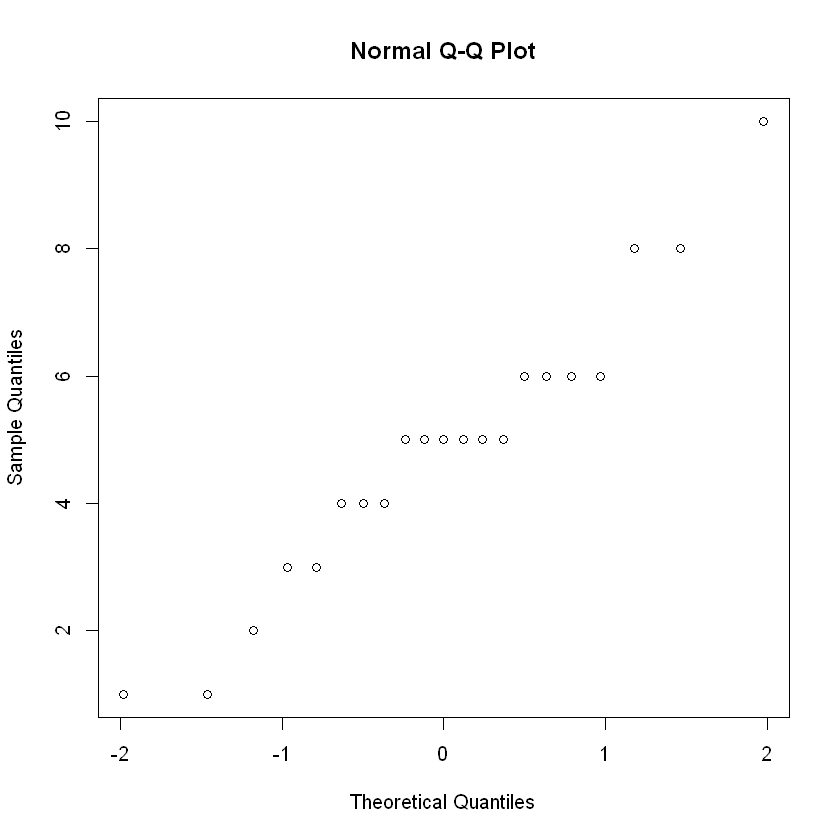

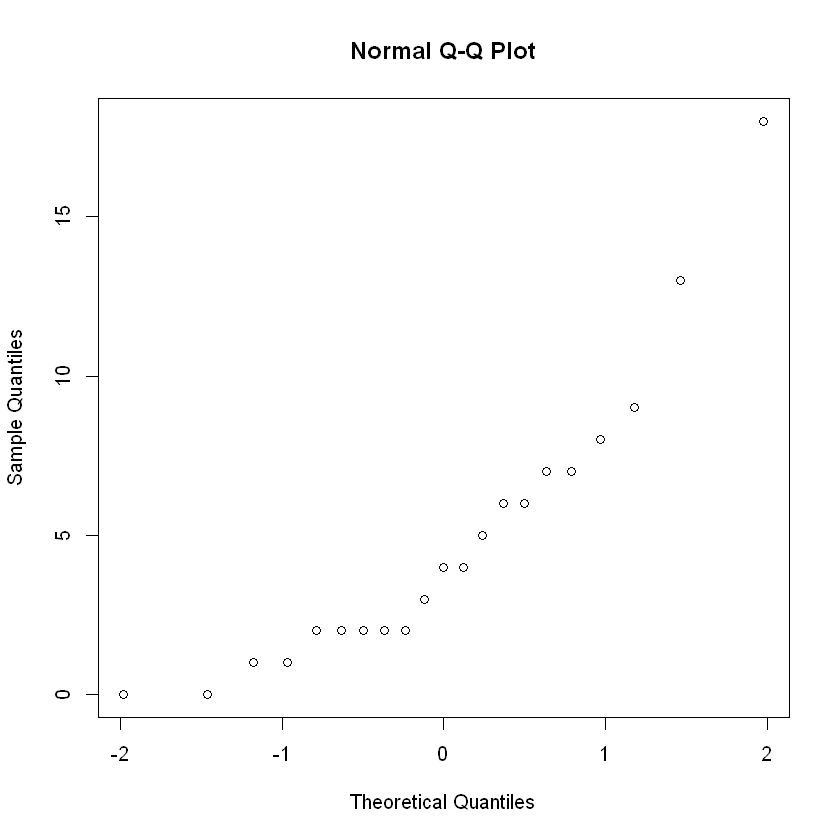

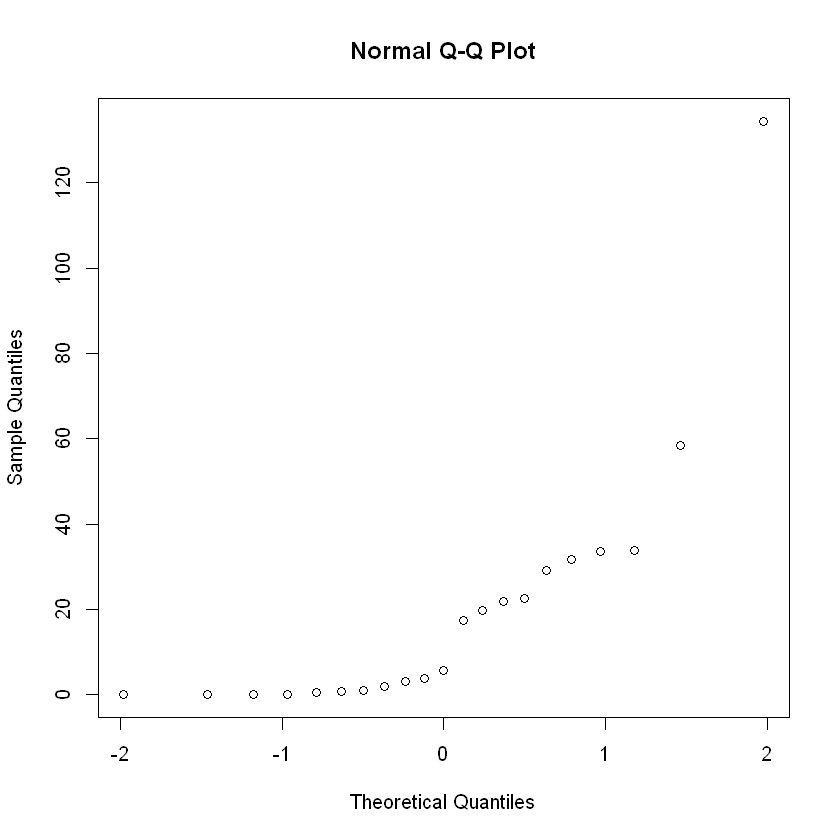

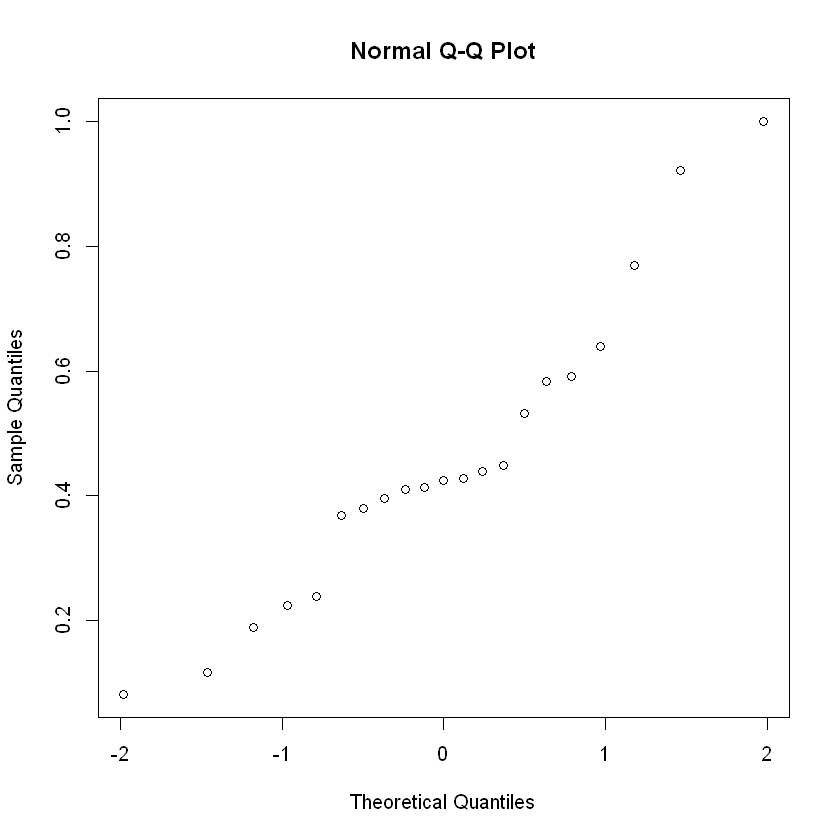

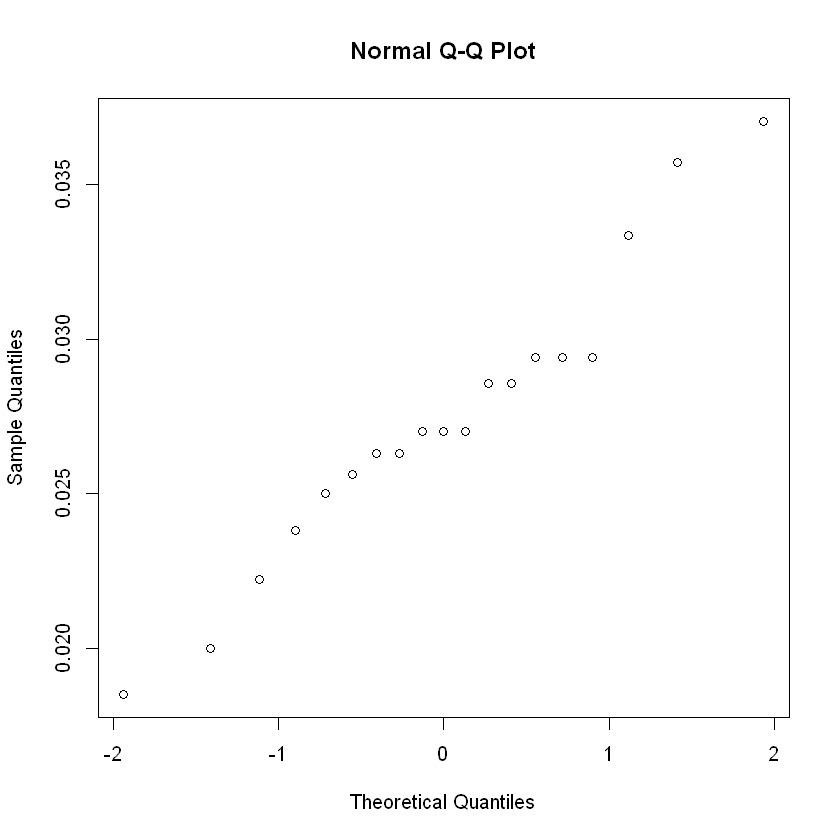

$in_degree
$in_degree$x
 [1]  1.1797611  1.9807524 -0.2410404 -0.1196481  0.4972006 -1.1797611
 [7] -0.9674216  0.0000000  0.6374842 -1.9807524  0.7916386  1.4652338
[13] -1.4652338  0.1196481 -0.6374842 -0.4972006  0.9674216 -0.3661064
[19]  0.2410404 -0.7916386  0.3661064

$in_degree$y
 [1]  8 10  5  5  6  2  3  5  6  1  6  8  1  5  4  4  6  4  5  3  5


$out_degree
$out_degree$x
 [1]  0.2410404 -0.1196481 -0.7916386  0.3661064  0.6374842  0.4972006
 [7] -1.9807524 -1.1797611 -1.4652338  0.7916386  1.4652338  0.0000000
[13] -0.6374842 -0.4972006  0.9674216 -0.3661064  1.9807524 -0.9674216
[19]  1.1797611 -0.2410404  0.1196481

$out_degree$y
 [1]  5  3  2  6  7  6  0  1  0  7 13  4  2  2  8  2 18  1  9  2  4


$betweenness
$betweenness$x
 [1]  0.6374842  0.9674216 -0.3661064  0.7916386  0.1196481 -0.1196481
 [7] -1.9807524 -0.7916386 -1.4652338 -1.1797611  1.4652338  0.2410404
[13] -0.9674216  0.0000000  0.4972006 -0.4972006  1.9807524 -0.6374842
[19]  0.3661064 -0.2410404  1.1797611

$betweenness$y
 [1]  29.066667  33.483333   1.900000  31.666667  17.416667   3.733333
 [7]   0.000000   0.500000   0.000000   0.000000  58.450000  19.658333
[13]   0.000000   5.583333  22.566667   1.000000 134.433333   0.700000
[19]  21.883333   3.041667  33.916667


$eigen
$eigen$x
 [1]  1.4652338  1.9807524 -0.4972006  0.9674216 -0.3661064 -1.1797611
 [7] -0.7916386  0.4972006 -0.2410404 -1.4652338 -0.1196481  1.1797611
[13] -1.9807524  0.1196481 -0.6374842  0.3661064  0.7916386  0.2410404
[19]  0.0000000 -0.9674216  0.6374842

$eigen$y
 [1] 0.92195552 1.00000000 0.37939782 0.63907026 0.39560373 0.19010614
 [7] 0.23958251 0.53138501 0.41113854 0.11723726 0.41336194 0.76877948
[13] 0.08184685 0.42779019 0.36801931 0.44953816 0.59209877 0.43985882
[19] 0.42540552 0.22468209 0.58343291


$in_cl
$in_cl$x
 [1]  1.4121876  1.9379315 -0.4067243  0.5549229 -0.1323129 -1.1189584
 [7]         NA  0.7164975         NA -1.4121876  0.0000000  1.1189584
[13] -1.9379315 -0.5549229 -0.7164975  0.1323129  0.8994349  0.2669941
[19] -0.2669941 -0.8994349  0.4067243

$in_cl$y
 [1] 0.03571429 0.03703704 0.02631579 0.02941176 0.02702703 0.02222222
 [7]         NA 0.02941176         NA 0.02000000 0.02702703 0.03333333
[13] 0.01851852 0.02564103 0.02500000 0.02702703 0.02941176 0.02857143
[19] 0.02631579 0.02380952 0.02857143


$out_cl
$out_cl$x
 [1] -0.4067243 -0.7164975 -0.5549229  0.5549229  0.7164975  0.0000000
 [7]         NA -1.1189584         NA  0.1323129  1.4121876  0.2669941
[13] -0.1323129 -0.8994349  0.8994349 -1.4121876  1.9379315 -1.9379315
[19]  1.1189584 -0.2669941  0.4067243

$out_cl$y
 [1] 0.02380952 0.02272727 0.02272727 0.03225806 0.03333333 0.03030303
 [7]         NA 0.02083333         NA 0.03030303 0.04166667 0.03030303
[13] 0.02631579 0.02127660 0.03333333 0.01785714 0.05000000 0.01639344
[19] 0.03571429 0.02564103 0.03030303

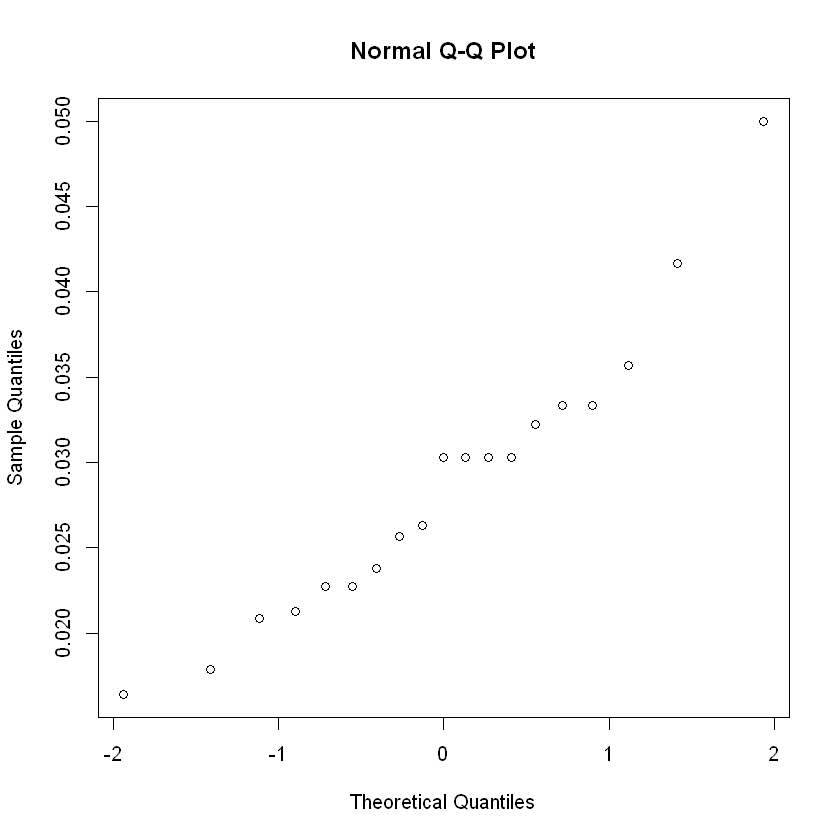

In [65]:
apply(friendship_centrality_all[,-1], 2, shapiro.test)
apply(friendship_centrality_all[,-1], 2, qqnorm)

Not all metrics are normally distributed (betweenness and out_degree). 
So, better compute Spearman correlation coefficient

In [66]:
centrality_corr <- cor(friendship_centrality_all[,-1], 
                       use='complete.obs', # has to be set as we have a few NAs
                       method = 'spearman')
centrality_corr

,in_degree,out_degree,betweenness,eigen,in_cl,out_cl
in_degree,1.0000000,0.24469670,0.6912711,0.77868134,0.82661913,0.18265620
out_degree,0.2446967,1.00000000,0.6248662,-0.04344217,-0.02582419,0.92737511
betweenness,0.6912711,0.62486621,1.0000000,0.55901717,0.53063441,0.58977315
eigen,0.7786813,-0.04344217,0.5590172,1.00000000,0.95859961,-0.13315883
in_cl,0.8266191,-0.02582419,0.5306344,0.95859961,1.00000000,-0.09565991
out_cl,0.1826562,0.92737511,0.5897732,-0.13315883,-0.09565991,1.00000000


Not that easy to read and follow...
We will use the corrpolot() function from the *corrplot* R package 
to visually represent the computed correlations table

In [69]:
#install.packages('corrplot')
library(corrplot)

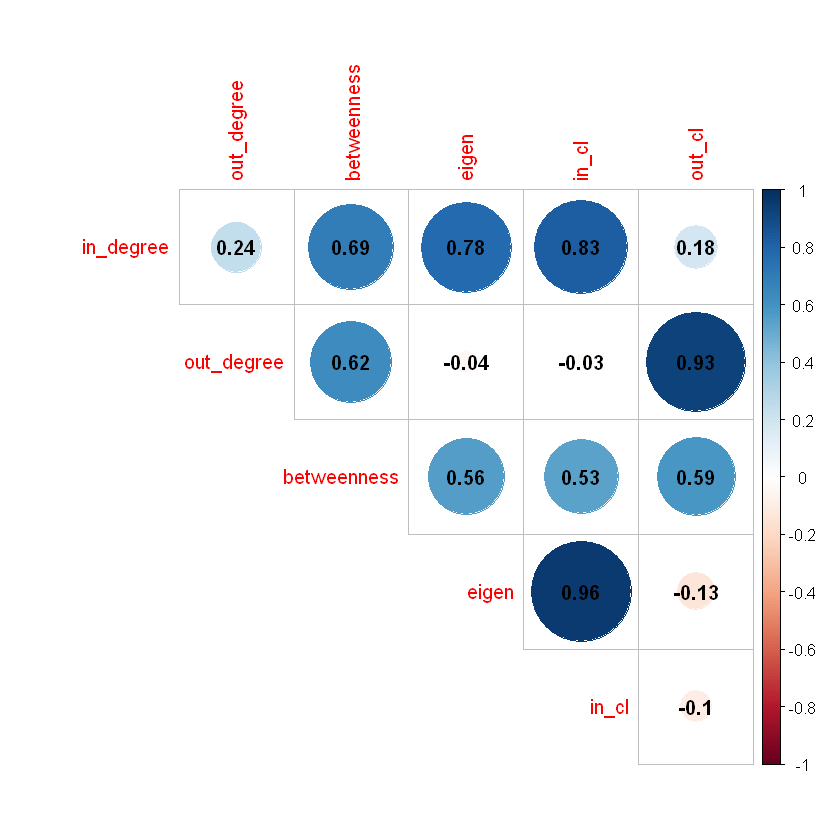

In [70]:
corrplot(corr = centrality_corr, 
         type = "upper", 
         diag = FALSE,
         addCoef.col = "black")

Note:
To examine the plotting options of the corrplot function
check, for example, this page:
https://rpubs.com/melike/corrplot

Interpretation:
In-degree and out-degree have low positive correlation (rho = 0.24),
indicating that naming someone a friend is not that often reciprocated
(e.g., naming many people as friends does not mean that the person will
be recognised as a friend by many others)

In-degree is highly positively correlated with in-closeness, eigenvector 
centrality (EC), and betweenness. This suggests that those who have been
named by many others as friends have good network position that is often
associated with having power and influence in the network. 

Out-degree is highly correlated with out-closeness, and to a lesser 
extent with betweeness. This implies that those who have named many alters
as friends have higher chances to act as intermediaries in the network
(betweenness) and can reach many others through outbound edges.

There is almost perfect positive correlation between in-closeness and
eigenvector centrality. It suggests that those who are close to many others 
by being named a friend are also those who have well connected friends 
(eigenvector). Both metrics are also highly correlated with in-degree. 

##### TASK 6: 

Do the same kind of analysis - computation of centrality measures 
and interpretation of their correlations for the advice network.